In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")
df=pd.read_excel(r"C:\Users\user\OneDrive\Desktop\customer_churn_analysis\data\telco_churn_clean.xlsx")
df.head()

,customerID,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,DSL,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,34,DSL,One year,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,2,DSL,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,DSL,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,2,Fiber optic,Month-to-month,Electronic check,70.70,151.65,Yes


In [8]:
df.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
tenure             0
InternetService    0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [9]:
df['Churn'].value_counts(normalize= True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

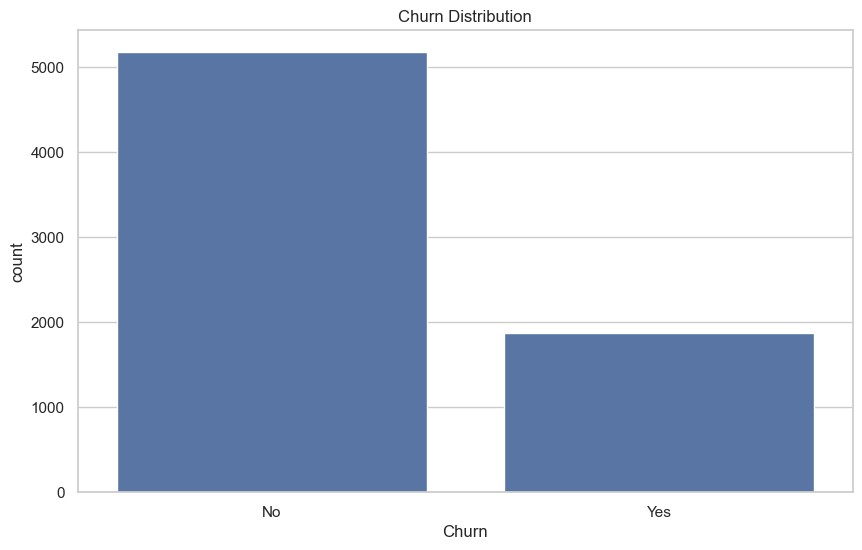

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'Churn', data = df)
plt.title('Churn Distribution')
plt.show()

### Around one-quarter of customers churn, confirming a segnificant retention issue

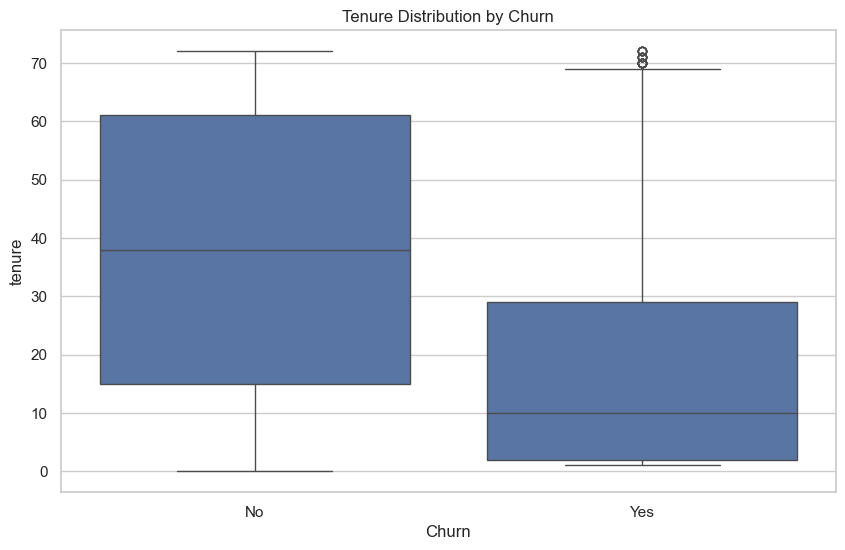

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x= 'Churn', y= 'tenure', data = df)
plt.title('Tenure Distribution by Churn')
plt.show()

### Churned customers have significantly lower tenure, indicating that early-stage customers are more likely to leave

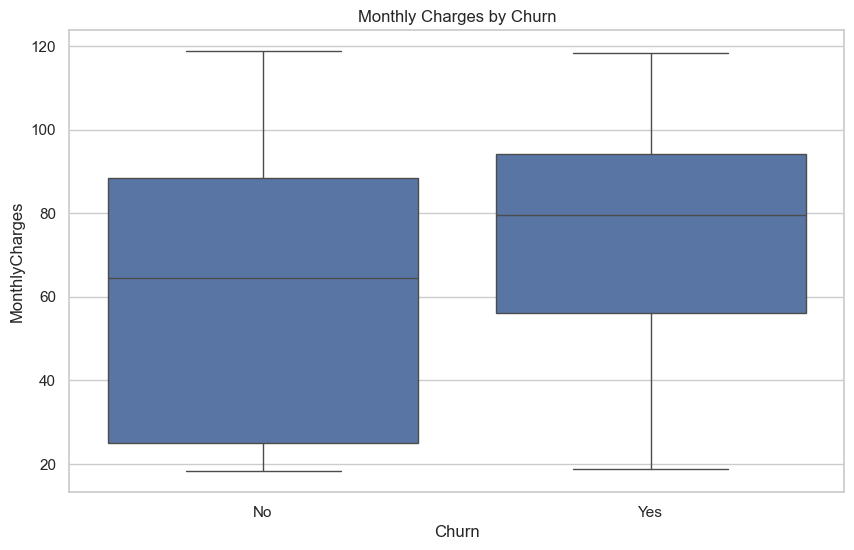

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data= df)
plt.title('Monthly Charges by Churn')
plt.show()

### Customers who churn tend to pay higher monthly charges, suggesting price sensitivity

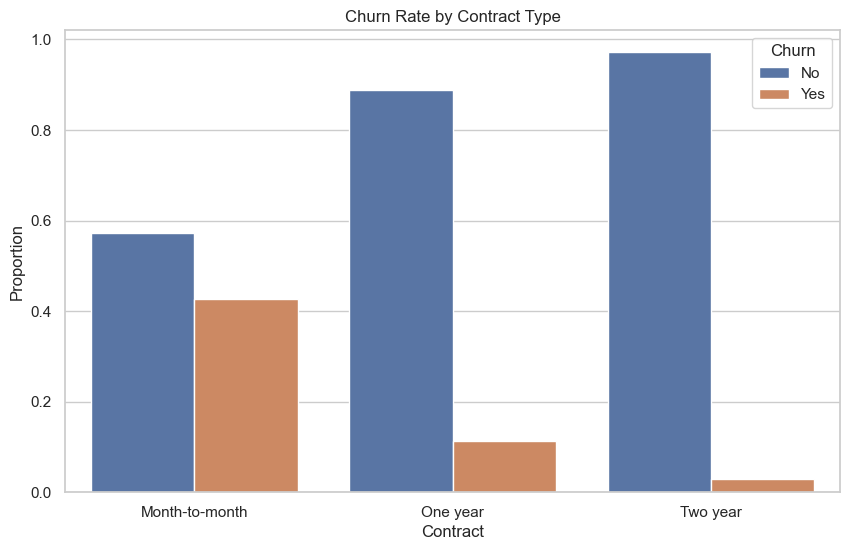

In [29]:
churn_contract= (df.groupby
                 ('Contract')['Churn']
                .value_counts(normalize= True).
                rename('rate').reset_index())
plt.figure(figsize=(10,6))
sns.barplot(
    x='Contract',
    y='rate',
    hue= 'Churn',
    data= churn_contract
)
plt.title("Churn Rate by Contract Type")
plt.ylabel('Proportion')
plt.show()

### Month-to-Month contracts show the highest churn rate, while long-term contracts improve retention

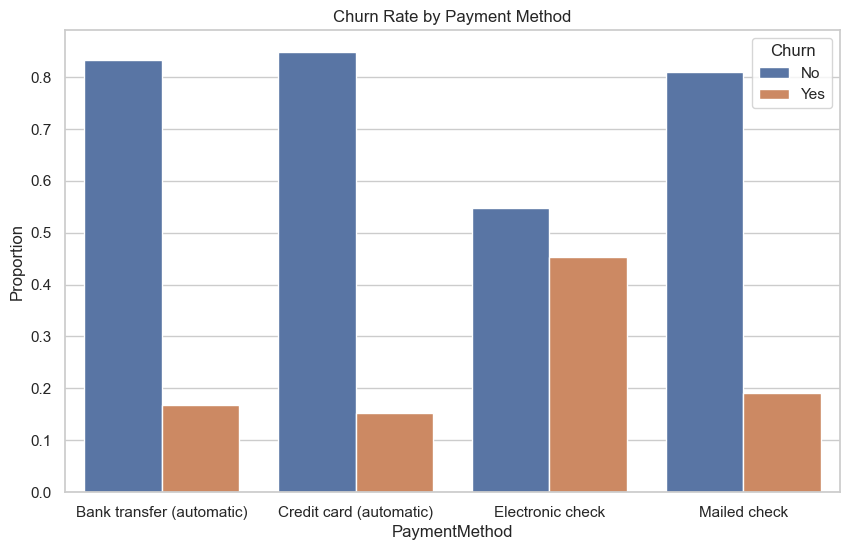

In [28]:
churn_payment=(df.groupby('PaymentMethod')['Churn'].
              value_counts(normalize= True).
              rename('rate').reset_index())
plt.figure(figsize=(10,6))
sns.barplot(
    x='PaymentMethod',
    y='rate',
    hue='Churn',
    data= churn_payment
)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Proportion')
plt.show()

### Certin payment methods are associated with higher churn, indicating potential friction in billing experience

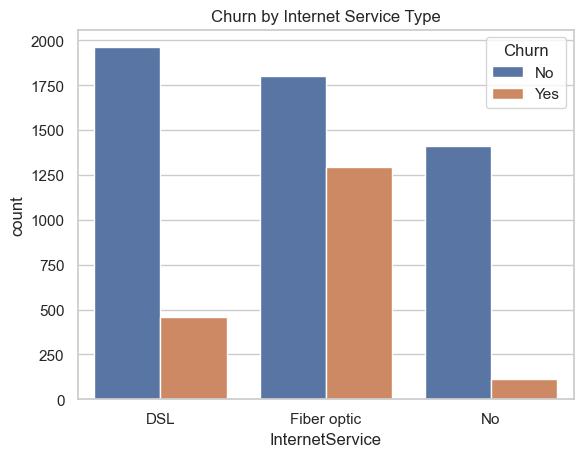

In [34]:
sns.countplot(x='InternetService', hue='Churn', data= df)
plt.title('Churn by Internet Service Type')
plt.show()

### Customers using fiber optic internet service exhibit a higher churn rate compared to other service types, suggesting potential issues related to pricing, service quality, or customer expectations.